# Iris predictions

In [34]:
import pymysql
from sqlalchemy import create_engine
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import getpass
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings("ignore")

In [35]:
df=pd.read_csv('iris_dirty.csv')

In [36]:
df

,5.1,3.5,1.4,2 mm,Iris-setosa
0,4.9,3.0,1.4,2 mm,Iris-setosa
1,4.7,3.2,1.3,2 mm,Iris-setosa
2,4.6,3.1,1.5,2 mm,Iris-setosa
3,5.0,3.6,1.4,2 mm,Iris-setosa
4,5.4,3.9,1.7,4 mm,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,23 mm,Iris-virginica
146,6.3,2.5,5.0,19 mm,Iris-virginica
147,6.5,3.0,5.2,20 mm,Iris-virginica
148,6.2,3.4,5.4,23 mm,Iris-virginica


## Import the dataset iris_dirty.csv from this repo into a Pandas dataframe. Check the Pandas documentation of read_csv() and use the column names sepal_length, sepal_width, petal_length, petal_width and class when you read in the data.

In [37]:
df = pd.read_csv('iris_dirty.csv',
                 names=['sepal_length',
                        'sepal_width',
                        'petal_length',
                        'petal_width',
                        'class',
                       ],
                header=None,
                )

In [38]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,23 mm,Iris-virginica
147,6.3,2.5,5.0,19 mm,Iris-virginica
148,6.5,3.0,5.2,20 mm,Iris-virginica
149,6.2,3.4,5.4,23 mm,Iris-virginica


## Explore the data with the known Pandas functions head(), info(), describe(), count(), value_counts() (for all columns). Watch for missing values, duplicates, spelling errors, non-uniform units, columns with datatypes they shouldn't have etc.

In [39]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa
5,5.4,3.9,1.7,4 mm,Iris-setosa
6,4.6,3.4,1.4,3 mm,Iris-setosa
7,5.0,3.4,1.5,2 mm,Iris-setosa
8,4.4,2.9,1.4,2 mm,Iris-setosa
9,4.9,3.1,1.5,1 mm,Iris-setosa


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [41]:
df['sepal_width'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6, nan])

In [42]:
df.describe()

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


In [43]:
df.count()

sepal_length    151
sepal_width     150
petal_length    151
petal_width     151
class           151
dtype: int64

In [44]:
df.value_counts()

sepal_length  sepal_width  petal_length  petal_width  class          
4.9           3.1          1.5           1 mm         Iris-setosa        3
7.0           3.2          4.7           14 mm        Iris-versicolor    2
6.3           2.9          5.6           18 mm        Iris-virginica     1
6.2           3.4          5.4           23 mm        Iris-virginica     1
6.3           2.3          4.4           13 mm        Iris-versicolor    1
                                                                        ..
5.5           2.3          4.0           13 mm        Iris-versicolor    1
              2.4          3.7           10 mm        Iris-versicolor    1
                           3.8           11 mm        Iris-versicolor    1
              2.5          4.0           13 mm        Iris-versicolor    1
58.0          2.7          5.1           19 mm        Iris-virginica     1
Length: 147, dtype: int64

## Substitute missing values with the column mean. Check/remove duplicates. Correct possible spelling errors.

In [45]:
# NaN + column mean
df.fillna(value=df.mean(),inplace= True)

In [46]:
# Checked if the nan value got replaced successfully. nan value doesn't show anymore
df['sepal_width'].unique()

array([3.5       , 3.        , 3.2       , 3.1       , 3.6       ,
       3.9       , 3.4       , 2.9       , 3.7       , 4.        ,
       4.4       , 3.8       , 3.3       , 4.1       , 4.2       ,
       2.3       , 2.8       , 2.4       , 2.7       , 2.        ,
       2.2       , 2.5       , 2.6       , 3.05733333])

In [47]:
#check duplicate
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
146    False
147    False
148    False
149    False
150    False
Length: 151, dtype: bool

In [48]:
#remove duplicate
df=df.drop_duplicates()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  148 non-null    float64
 1   sepal_width   148 non-null    float64
 2   petal_length  148 non-null    float64
 3   petal_width   148 non-null    object 
 4   class         148 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.9+ KB


In [50]:
#correct spelling errors with Regex
df['class'].unique() 

array(['Iris-setosa', 'Iris-setsoa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [51]:
df['class'].replace("Iris-setsoa","Iris-setosa",inplace=True)

In [52]:
df['class'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Bring all columns to centimeter length. Before, transform any column to numeric if necessary.

In [53]:
# Regex extract 'mm'
# Change petal_width dtype to float
# transform mm to cm
# Program to extract numbers from a string

import re

df['petal_width']= df['petal_width'].str.extract('(\d+)')

In [54]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2,Iris-setosa


In [55]:
df.petal_width=df.petal_width.astype(float)
df['petal_width'].dtype

dtype('float64')

In [56]:
df['petal_width'].value_counts()

2.0     28
13.0    13
18.0    12
15.0    12
14.0     8
23.0     8
10.0     7
4.0      7
3.0      7
21.0     6
20.0     6
12.0     5
19.0     5
1.0      4
16.0     4
25.0     3
22.0     3
24.0     3
11.0     3
17.0     2
6.0      1
5.0      1
Name: petal_width, dtype: int64

In [57]:
df['petal_width']=df['petal_width']/10

In [58]:
df['petal_width'].value_counts()

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
2.1     6
2.0     6
1.2     5
1.9     5
0.1     4
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64

In [59]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa


## Check for outliers with .describe() or means of plotting. Think about the appropriate way to correct for possible outliers and perform that correction.

In [60]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,148.000000,148.000000,148.000000,148.000000
mean,6.208784,3.055793,3.789189,1.213514
std,4.365089,0.435520,1.756470,0.757426
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


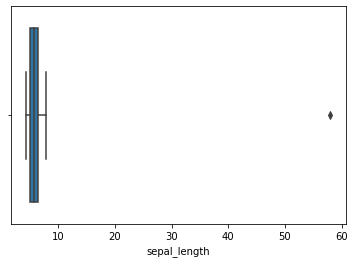

In [61]:
# There is an outlier in 'sepal_lenght' as the mean value and the max value have a relatively big gap, 
# let's check the outlier's value through the box_plot
box_plot = sns.boxplot(x="sepal_length", y=None, data=df)

In [62]:
# as there is only 1 value = 58.0, i assume that could be a type error that was supposed to be 5.8 (balanced with the other values)
# I won't drop the value out but instead will replace it with 5.8
df['sepal_length'].value_counts()

5.0     10
5.1      9
6.3      9
6.7      8
5.7      8
5.5      7
6.4      7
5.6      6
5.4      6
6.1      6
6.0      6
5.8      6
6.5      5
4.8      5
4.6      4
5.2      4
6.9      4
4.9      4
7.7      4
6.2      4
5.9      3
4.4      3
6.8      3
7.2      3
6.6      2
4.7      2
7.3      1
7.9      1
7.4      1
4.5      1
7.6      1
7.1      1
5.3      1
4.3      1
7.0      1
58.0     1
Name: sepal_length, dtype: int64

In [64]:
def type_error(x):
    if x==58:
        return 58/10
    else:
        return x

In [65]:
df['sepal_length']=df['sepal_length'].apply(type_error)

In [66]:
df['sepal_length'].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
4.9     4
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

## Plot a correlation matrix with a heatmap between the numeric features.

In [67]:
numerical=df._get_numeric_data()
corre_matrix=numerical.corr() 

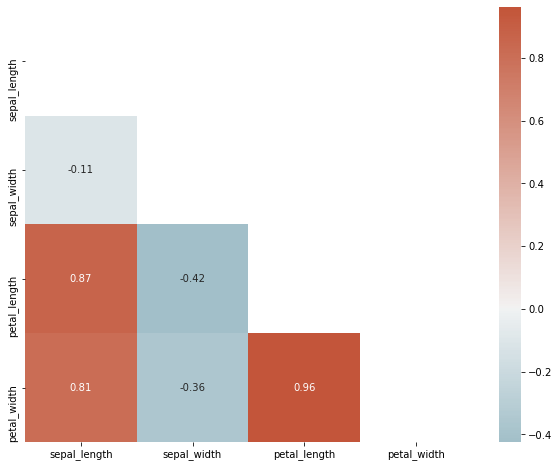

In [68]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(10,8))
ax=sns.heatmap(corre_matrix, mask=mask, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True);

## Model the relationship between our features (the four numeric flower metrics) and the label (class) with Logistic Regression using LogisticRegression() from the sklearn.linear_model module. For the purpose of model validation, use the known train-test-split method with a size parameter of 0.3. Calculate the predicted labels, the accuracy score of y_test and y_predicted and plot a confusion matrix of the two.

In [69]:
y=df['class']
X=df.drop('class',axis=1)
X_num=X.select_dtypes(include=np.number)#or include=number

In [70]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_num, y,test_size = 0.3, random_state = 40)

In [71]:
classification = LogisticRegression(max_iter=500)

In [72]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [73]:
y_test_pred=classification.predict(X_test)

In [74]:
accuracy_score(y_test,y_test_pred)

0.9333333333333333

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [76]:
confusion_matrix(y_test,y_test_pred)

array([[14,  0,  0],
       [ 0, 15,  2],
       [ 0,  1, 13]], dtype=int64)

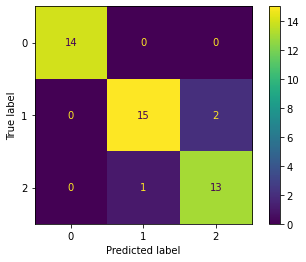

In [77]:
cmx=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

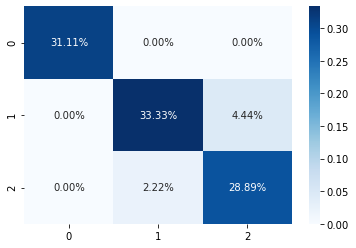

In [78]:
cmx=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cmx/np.sum(cmx), annot=True, fmt='.2%', cmap='Blues');

## Thank you Kofi and Sian for the patience:)